In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [13]:
df = pd.read_csv('marketing_campaign.csv')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

REFERENCE_DATE = df['Dt_Customer'].max() + pd.Timedelta(days=1)

df['Days'] = REFERENCE_DATE - df['Dt_Customer']

df['Days'] = df['Days'].dt.days

df = df.drop(columns=['Dt_Customer'])

df = pd.get_dummies(df)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,False,False,False,False,False,False,True,False,False,False
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,False,False,False,False,False,False,True,False,False,False
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,False,False,False,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,False,False,False,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,False,True,False,False,False,True,False,False,False,False


In [14]:
df["Total_Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [15]:
spending_threshold = df["Total_Spent"].quantile(0.75)
df["is_high_spender"] = df["Total_Spent"] > spending_threshold

In [16]:
mnt_columns = [col for col in df.columns if col.startswith('Mnt')]

exclude = mnt_columns + ['Total_Spent', 'is_high_spender', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', "NumWebPurchases"]

X = df.drop(columns=exclude, axis=1)
y = df['is_high_spender']


In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X = imputer.fit_transform(X)

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1, stratify=y
)

In [19]:
predict_high_spender = SVC(kernel='rbf', random_state=1)
predict_high_spender.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
y_pred = predict_high_spender.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.8683


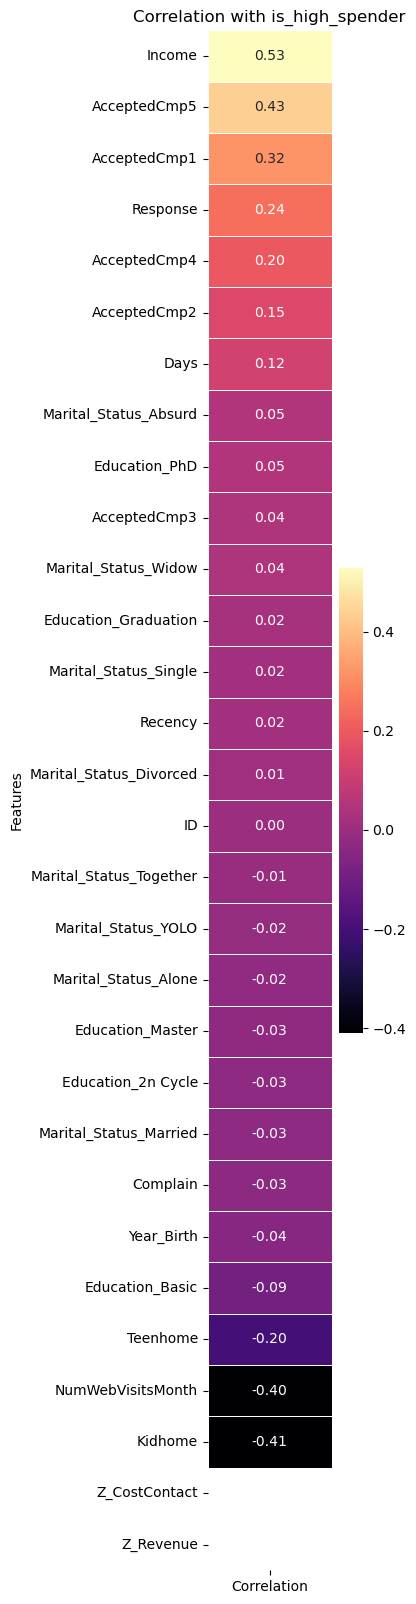

In [21]:

exclude2 = mnt_columns + ["Total_Spent", 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', "NumWebPurchases"]
df2 = df.drop(columns=exclude2)

correlation_matrix = df2.corr()


target_corr = correlation_matrix['is_high_spender'].sort_values(ascending=False)


target_corr = target_corr.drop('is_high_spender')


target_corr_df = target_corr.to_frame(name='Correlation')

plt.figure(figsize=(2, 20))
sns.heatmap(
    target_corr_df,
    annot=True, 
    fmt=".2f",
    cmap='magma', 
    linewidths=.5,
    cbar=True,
    yticklabels=target_corr_df.index.tolist(), 
    xticklabels=['Correlation']
)
plt.title('Correlation with is_high_spender')
plt.ylabel('Features')
plt.show()

In [22]:
X = df.drop(columns="Response", axis=1)
y = df['Response']

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1, stratify=y
)

predict_response = SVC(kernel='rbf', random_state=1)
predict_response.fit(X_train, y_train)

y_pred = predict_response.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8862
